In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
missing_values = df.isnull().sum()
print("Missing Values :\n ",missing_values)

data_types = df.dtypes
print("Data Types :\n ",data_types)

data_Shape = df.shape
print("Data Shapes : ",data_Shape)

numeric_features = df.select_dtypes(include=['float64','int64'])

statistics = numeric_features.describe()
print("Statistics :\n ",statistics)



Missing Values :
  id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64
Data Types :
  id                       

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectPercentile, f_regression

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']
selector = SelectPercentile(score_func=f_regression, percentile=10)  # Select top 10% features
X_selected = selector.fit_transform(X, y)

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.08547076882308872
Test MSE: 0.15702615155436334


c:\Users\jhonn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01448e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct a pipeline with preprocessing, feature scaling, and modeling
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

# Define hyperparameters to tune
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10]
}

# Perform grid search cross-validation to find the best model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.02205017519737756
Test MSE: 0.15988245422074246


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct a pipeline with preprocessing, feature scaling, and modeling
pipeline = make_pipeline(
    StandardScaler(),
    Ridge()
)

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]
}

# Perform grid search cross-validation to find the best model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

Train MSE: 3.0939480676678397e-10
Test MSE: 0.2698890970766345
Train RMSE: 1.7589622132575332e-05
Test RMSE: 0.5195085149221661
Train MAE: 1.3649516763570875e-05
Test MAE: 0.40520829857045093


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct a pipeline with preprocessing, feature scaling, and modeling
pipeline = make_pipeline(
    StandardScaler(),
    Ridge()
)

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]
}

# Perform grid search cross-validation to find the best model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

Train MSE: 3.0939480676678397e-10
Test MSE: 0.2698890970766345
Train RMSE: 1.7589622132575332e-05
Test RMSE: 0.5195085149221661
Train MAE: 1.3649516763570875e-05
Test MAE: 0.40520829857045093


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection using Lasso regression
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct a pipeline with preprocessing, feature scaling, and modeling
pipeline = make_pipeline(
    StandardScaler(),
    SelectFromModel(Lasso(alpha=0.1)),
    Lasso()
)

# Define hyperparameters to tune
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0]
}

# Perform grid search cross-validation to find the best model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

Train MSE: 0.2097028831417066
Test MSE: 0.2129679834690789
Train RMSE: 0.45793327367828013
Test RMSE: 0.46148454304459524
Train MAE: 0.3567914074925108
Test MAE: 0.36729134336318087


In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jhonn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the random regressor model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

#Perform permutation analysis 
result = permutation_importance(model,X_test,y_test,n_repeats=10,random_state=42)

#Get features importances and their indices 
importances= result.importances_mean
indices = np.argsort(importances)

#Print feature importance ranking 

for i in indices:
    print(f"{X.columns[i]}: {importances[i]}")


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),    epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

property_type_House: -0.005072016562536375
cleaning_fee: -0.0009763789864609907
host_identity_verified_f: -0.0007328783832254437
city_LA: -0.0006176454934774922
zipcode_20009: -0.000589243059768807
instant_bookable_t: -0.0005698976381149689
last_review_2017-04-18: -0.0005166341969481958
property_type_Condominium: -0.0004536017508542267
zipcode_11208: -0.0004417463944208277
city_Boston: -0.00043411708281474446
zipcode_94110: -0.0004218984237144063
neighbourhood_East New York: -0.000382159085475664
neighbourhood_Alphabet City: -0.0002755576120420655
host_identity_verified_t: -0.00026525329880626724
last_review_2017-05-02: -0.00024316528823038476
last_review_2017-10-01: -0.00018832742257979262
last_review_2017-09-13: -0.00015233692801757125
last_review_2017-09-28: -0.00015090984902021987
last_review_2017-09-24: -0.00013493275273872561
zipcode_11225: -0.00012996913906421215
host_response_rate_60%: -0.00012770682081681973
property_type_Other: -0.00011153014627792723
neighbourhood_Jamaica: -

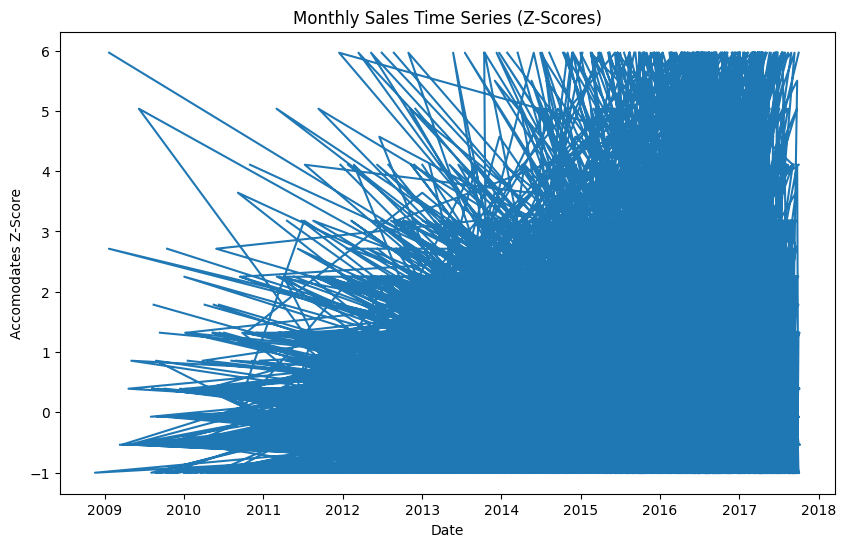

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Convert the date column to pandas DateTime object
df['first_review'] = pd.to_datetime(df['first_review'])

# Set the DataFrame index to the date column
df.set_index('first_review', inplace=True)

# Calculate the z-scores of the 'log_price' column
df['accomodates_zscore'] = stats.zscore(df['accommodates'])

# Plot the time series graph with z-scores
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['accomodates_zscore'])
plt.xlabel('Date')
plt.ylabel('Accomodates Z-Score')
plt.title('Monthly Sales Time Series (Z-Scores)')
plt.show()

In [11]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Convert the date columns to pandas DateTime objects
df['first_review'] = pd.to_datetime(df['first_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

# Calculate the time difference between consecutive dates in each column
first_review_diff = df['first_review'].diff()
host_since_diff = df['host_since'].diff()
last_review_diff = df['last_review'].diff()

# Determine the most common time difference using the pd.Series.mode() method
first_review_freq = first_review_diff.mode().iloc[0]
host_since_freq = host_since_diff.mode().iloc[0]
last_review_freq = last_review_diff.mode().iloc[0]

# Check the inferred frequencies
print(f"Inferred frequency for first_review: {first_review_freq}")
print(f"Inferred frequency for host_since: {host_since_freq}")
print(f"Inferred frequency for last_review: {last_review_freq}")

Inferred frequency for first_review: -27 days +00:00:00
Inferred frequency for host_since: -87 days +00:00:00
Inferred frequency for last_review: 0 days 00:00:00


Missing dates in first_review: DatetimeIndex(['2008-11-18', '2008-11-19', '2008-11-20', '2008-11-21',
               '2008-11-22', '2008-11-23', '2008-11-24', '2008-11-25',
               '2008-11-26', '2008-11-27',
               ...
               '2013-02-02', '2013-02-06', '2013-02-21', '2013-02-22',
               '2013-02-23', '2013-02-24', '2013-02-25', '2013-04-05',
               '2013-11-24', '2014-07-21'],
              dtype='datetime64[ns]', length=691, freq=None)
Missing dates in host_since: DatetimeIndex(['2008-03-05', '2008-03-06', '2008-03-07', '2008-03-08',
               '2008-03-09', '2008-03-10', '2008-03-11', '2008-03-12',
               '2008-03-13', '2008-03-14',
               ...
               '2010-03-30', '2010-04-14', '2010-05-08', '2010-05-15',
               '2010-05-22', '2010-05-27', '2010-06-05', '2010-07-03',
               '2010-07-11', '2017-10-02'],
              dtype='datetime64[ns]', length=416, freq=None)
Missing dates in last_review: Datetime

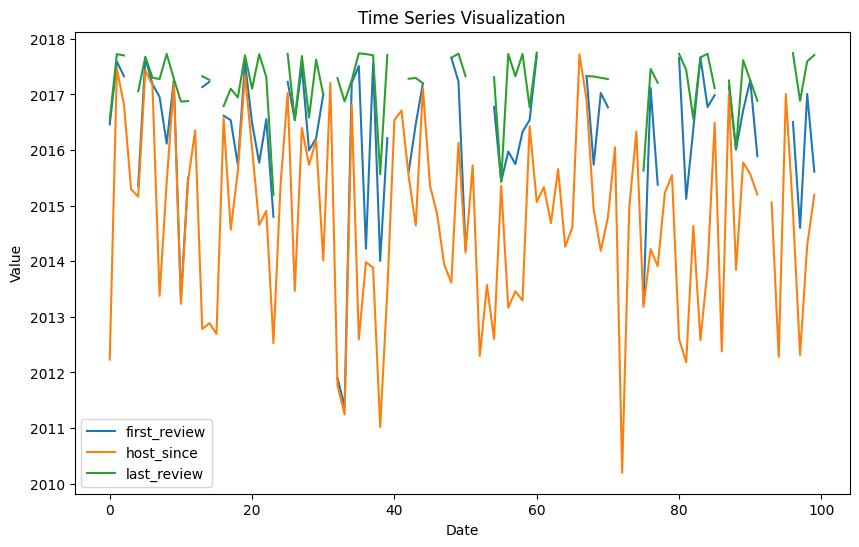

In [14]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Convert the date columns to pandas DateTime objects
df['first_review'] = pd.to_datetime(df['first_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

# Check for missing or irregularly spaced dates
date_columns = ['first_review', 'host_since', 'last_review']
for column in date_columns:
    missing_dates = pd.date_range(start=df[column].min(), end=df[column].max()).difference(df[column])
    if len(missing_dates) > 0:
        print(f"Missing dates in {column}: {missing_dates}")
    else:
        print(f"No missing dates in {column}")

# Explore a subset of the data
subset_df = df.head(100)  # Select a subset of the data (e.g., first 100 rows)

# Visualize the time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(subset_df['first_review'], label='first_review')
plt.plot(subset_df['host_since'], label='host_since')
plt.plot(subset_df['last_review'], label='last_review')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Visualization')
plt.legend()
plt.show()

In [9]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Convert the date column to a pandas DateTimeIndex
df['first_review'] = pd.to_datetime(df['first_review'])

# Set the DataFrame index to the DateTimeIndex
df.set_index('first_review', inplace=True)

# Infer the frequency of the DateTimeIndex
frequency = pd.infer_freq(df.index)

print(f"The inferred frequency of the dataset is: {frequency}")

The inferred frequency of the dataset is: None


In [22]:
pip install keras

You should consider upgrading via the 'c:\Users\jhonn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connect

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Reduce the size of the dataset (optional)
df = df.sample(n=1000, random_state=42)  # Sample a smaller subset of the data

# Handle missing values
df = df.dropna()  # Remove rows with missing values

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Perform feature selection (optional)
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)

Epoch 1/100
14/14 [==============================] - 1s 34ms/step - loss: 9.3800 - val_loss: 24.3569
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 11.9623 - val_loss: 1.5560
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 1.8698 - val_loss: 2.4686
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8774 - val_loss: 0.9461
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.3900 - val_loss: 0.8442
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.1168 - val_loss: 1.1218
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0547 - val_loss: 0.9095
Epoch 8/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0441 - val_loss: 1.0204
Epoch 9/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0188 - val_loss: 1.0089
Epoch 10/100
4/4 [==============================] - 0s 3ms/step
Train MSE: 0.11814817639048061
Tes

In [21]:
!pip install keras

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest,f_regression

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

#reduce size of dataset
df=df.sample(n=1000,random_state=42)

# Handle missing values
df = df.dropna()  # Remove rows with missing values


# Split the dataset into features (X) and target variable (y)
X = df.drop('log_price', axis=1)
y = df['log_price']

selector = SelectKBest(f_regression,k=10)
X_selected = selector.fit_transform(X,y)

# Split the dataset into train, test, and cross-validation sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:",mse_test)

ValueError: could not convert string to float: 'House'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
airbnb_data = pd.read_csv('train.csv')

# Split the data into features (X) and target variable (y)
X = airbnb_data[['bedrooms', 'description', 'amenities']]
y = airbnb_data['property_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


ValueError: could not convert string to float: 'Guesthouse in an affluent/bohemian quiet neighborhood, conveniently located close to Hollywood district, Griffith Park and downtown L.A.           A perfect place for a family with two kids. It has all the commodities and amenities typical of any home. It has Directv service and three TVs  in the house, each with a DVR receiver to program and record TV programs, as desired.   Also, a clear sky backyard (but comfortably shaded by trees,) is available for eating and having a "picnic at home" in warm days.  A variety of supermarkets available, from expensive to inexpensive, and to inexpensive but sophisticated ones. As for other commercial areas, Hollywood blvd is of course next to the neighborhood, with all its restaurants and stores, with its wide range on prices. Also, Glendale Galleria and the luxurious Americana shopping centers are few minutes away by bus (line 180, line 181 and line 92) toward Glendale.   It is completely and independently accessible guesthouse and co-host would be'

In [10]:
converted_log_price = pd.to_numeric(airbnb_data['log_price'], errors='coerce')
non_numeric_values = airbnb_data['log_price'][pd.isnull(converted_log_price)]
print(non_numeric_values.unique())

[]


In [11]:
print(airbnb_data['log_price'].dtype)

float64


In [12]:
print(airbnb_data['log_price'].isnull().sum())


0
